<a href="https://colab.research.google.com/github/rodrigonavas/statistics-and-calculus/blob/master/Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principal Component Analysis (PCA)

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

iris = sns.load_dataset('iris')

scaler = StandardScaler()
scaled_data = scaler.fit_transform(
    iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
)

In [2]:
covariance_matix = np.cov(scaled_data.T)
covariance_matix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

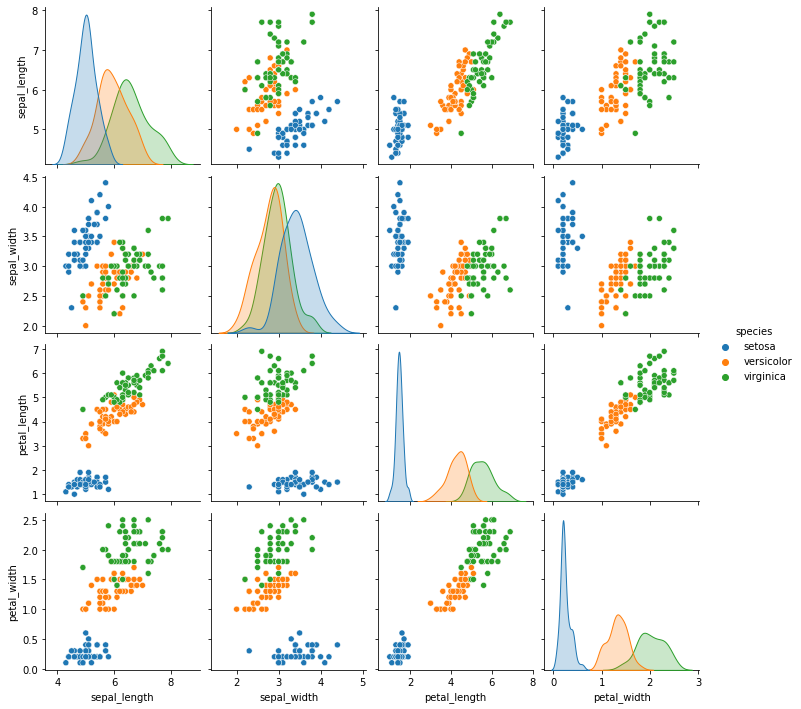

In [3]:
sns.pairplot(iris, hue='species')

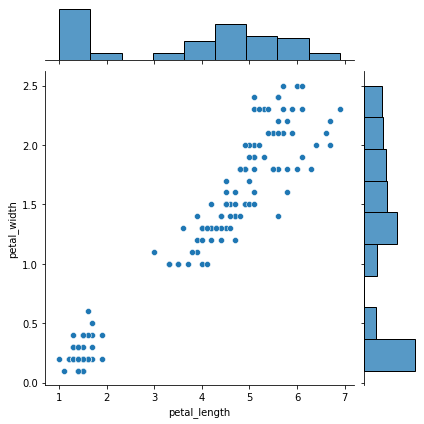

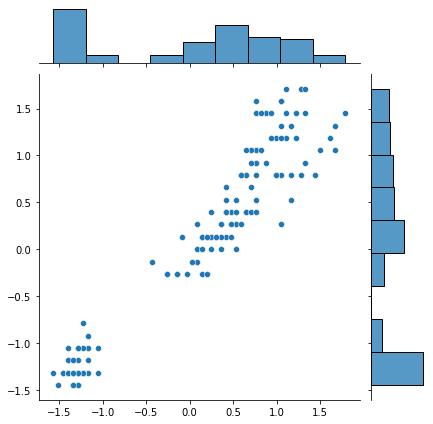

In [4]:
sns.jointplot(x = iris['petal_length'], y = iris['petal_width'])
sns.jointplot(x = scaled_data[:, 2], y = scaled_data[:, 3])

Descomposición de vectores y valores propios:
https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html

In [5]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matix)
eigen_values

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [6]:
eigen_vectors

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

La primera variable captura el 72% de la variación de las 4 columnas, así posteriormente

In [7]:
variance_explained = []
for i in eigen_values:
    variance_explained.append((i / sum(eigen_values)) * 100)

print(variance_explained)

[72.9624454132999, 22.850761786701725, 3.6689218892828612, 0.5178709107154993]


### PCA con sk-learn


In [8]:
from sklearn.decomposition import PCA

# reducir solamente a dos componentes
pca = PCA(n_components = 2)
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Detalle de los componentes

La primera captura el 72% y la segunda el 22%, muy parecido al método anterior

In [9]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

Añadir los valores de las reducciones como nuevas columnas al dataset original

In [11]:
iris['pca_1'] = scaled_data[: ,0]
iris['pca_2'] = scaled_data[: ,1]

iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,pca_1,pca_2
0,5.1,3.5,1.4,0.2,setosa,-0.900681,1.019004
1,4.9,3.0,1.4,0.2,setosa,-1.143017,-0.131979
2,4.7,3.2,1.3,0.2,setosa,-1.385353,0.328414
3,4.6,3.1,1.5,0.2,setosa,-1.506521,0.098217
4,5.0,3.6,1.4,0.2,setosa,-1.021849,1.249201


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


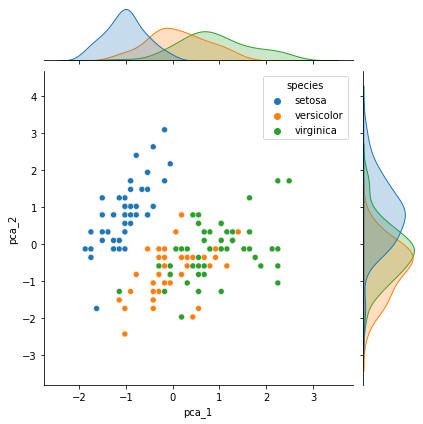

In [12]:
sns.jointplot(iris['pca_1'], iris['pca_2'], hue=iris['species'])